In [7]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd


### Задача 1

На семинаре мы разбирали классификацию изображений на основе kNN. В этом задании мы вернемся к датасету [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) и попробуем улучшить результат, полученный на семинаре.

Для начала, загрузите данные и разделите их на обучающую и тестовую части.

In [2]:
digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Число соседей в модели kNN является необучаемым параметром т.е. гиперпараметром который выставляется вручную. Как мы видели на лекции, выбор оптимального значения $k$ важен, так как слишком маленькое значение может привести к переобучению, а слишком большое — к недообучению.

Постройте график зависимости точности (`accuracy_score`) предсказания kNN от значения $k$ (от 1 до 20) для обучающей и тестовой выборок.

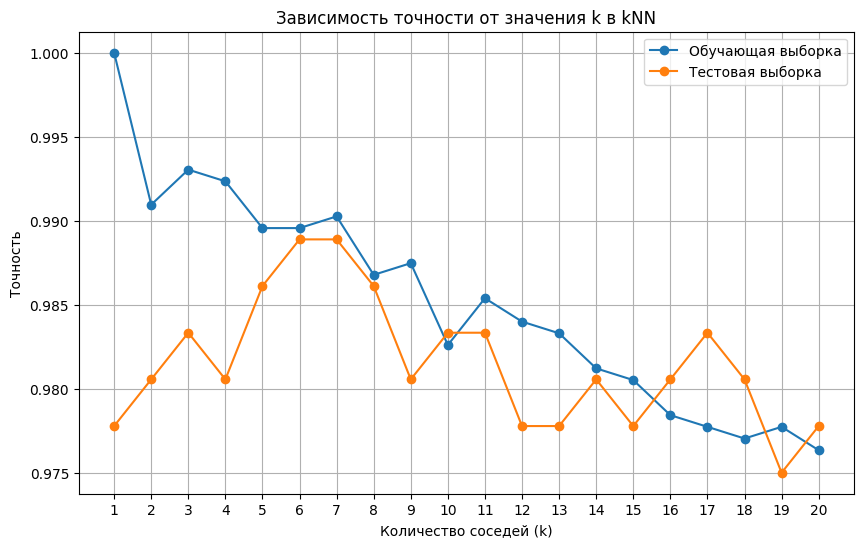

In [3]:
train_accuracies = []
test_accuracies = []

k_values = range(1, 21)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Обучающая выборка', marker='o')
plt.plot(k_values, test_accuracies, label='Тестовая выборка', marker='o')
plt.title('Зависимость точности от значения k в kNN')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Точность')
plt.xticks(k_values)
plt.grid()
plt.legend()
plt.show()

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- fe9171a6e245a953987df27f018c61c2 -->
&#x2753; **Вопрос** &#x2753;

> Почему при $k = 1$ на тренировочной выборке метрика качества составляет 100%.

**Ваш ответ:**  Потому что алгоритм идеально классифицирует все объекты

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- cdb15caec1719ca7ba80d25b716879ca -->
Помимо числа соседей гиперпараметром модели также является *метрика расстояния* между объектами.

> По умолчанию используется *Евклидова метрика* ($L_2$), согласно которой расстояние между двумя точками $x_1 =(x_{11}, …, x_{1d})$ и $x_2=(x_{21},…,x_{2n})$ в $d$-мерном пространстве определяется как:
$$\rho(x_1, x_2) = \sqrt{\sum^d_{j=1}\left(x_{1j} - x_{2j}\right)^2}.$$
>
> Иногда в kNN имеет смысл использовать другие метрики, например *метрику Манхэттена* ($L_1$).
$$\rho(x_1, x_2) = \sum^d_{j=1} \left|x_{1j} - x_{2j}\right|.$$
>
> Выбор одной из них зависит от особенностей задачи и данных. В частности,
>
> * метрика Манхэттена менее чувствительна к выбросам, чем евклидово расстояние, что делает её полезной для данных с сильным шумом или при наличии аномалий;
>
> * в задачах с разреженными данными (например, текстовые данные, представленные в виде векторов) метрика Манхэттена может работать лучше, чем евклидово расстояние.

Проведите аналогичный эксперимент используя в качестве гиперпараметра $L_1$-метрику (выясните сами, как ее задать). Выведите на одном графике зависимости точности (accuracy) от значения $k$ для обучающей и тестовой выборок для обоих метрик.

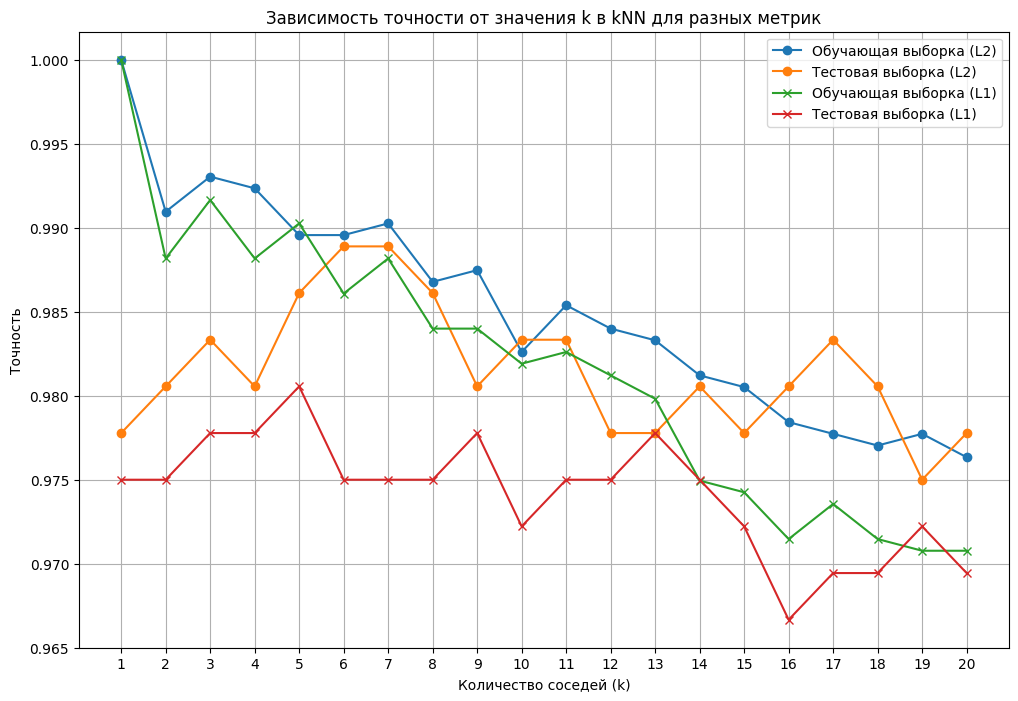

In [4]:
train_accuracies_l2 = []
test_accuracies_l2 = []
train_accuracies_l1 = []
test_accuracies_l1 = []

k_values = range(1, 21)
for k in k_values:
    knn_l2 = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_l2.fit(X_train, y_train)
    
    train_pred_l2 = knn_l2.predict(X_train)
    test_pred_l2 = knn_l2.predict(X_test)
    
    train_accuracies_l2.append(accuracy_score(y_train, train_pred_l2))
    test_accuracies_l2.append(accuracy_score(y_test, test_pred_l2))
    
    knn_l1 = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn_l1.fit(X_train, y_train)
    
    train_pred_l1 = knn_l1.predict(X_train)
    test_pred_l1 = knn_l1.predict(X_test)
    
    train_accuracies_l1.append(accuracy_score(y_train, train_pred_l1))
    test_accuracies_l1.append(accuracy_score(y_test, test_pred_l1))

plt.figure(figsize=(12, 8))

plt.plot(k_values, train_accuracies_l2, label='Обучающая выборка (L2)', marker='o')
plt.plot(k_values, test_accuracies_l2, label='Тестовая выборка (L2)', marker='o')

plt.plot(k_values, train_accuracies_l1, label='Обучающая выборка (L1)', marker='x')
plt.plot(k_values, test_accuracies_l1, label='Тестовая выборка (L1)', marker='x')

plt.title('Зависимость точности от значения k в kNN для разных метрик')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Точность')
plt.xticks(k_values)
plt.grid()
plt.legend()
plt.show()

&#x2754; **Вопрос** &#x2754;

> Как вы думаете почему смена метрики так сильно повлияла на характер кривых?

**Ваш ответ:**  Это всё из-за различий в чувствительности к выбросам, структуры данных и разреженности признаков. Потому что Евклидова чувствительнна к выбросам,  чем Манхэтонна

**Выводы:** ...

### Задача 2

#### 0. Подготовка данных

Титаник был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа. Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.


Загрузите данные с помощью `pandas`.

In [37]:
titanic = pd.read_csv("data\Dtrain.csv").dropna()
titanic.head()

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\User\AppData\Local\Temp\ipykernel_4448\1684020592.py:1: SyntaxWarning: invalid escape sequence '\D'
  titanic = pd.read_csv("data\Dtrain.csv").dropna()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


Для лучшего понимания процесса работы с данными, уточним ключевые термины.

> **Объект** — это единица данных, представленная набором признаков и используемая для обучения или предсказаний модели. В данной задаче являются пассажиры, им соответствуют *строки* таблицы данных.
>
> **Признаки (features)** — это характеристики, которые описывают объекты в данных. В таблицах данных они обычно соответствуют *колонкам*. В данной задаче мы будем работать со следующими признаками
>
> * `Pclass` — класс билета (1 = первый класс, 2 = второй класс, 3 = третий класс);
>
> * `Age` — возраст пассажира;
>
> * `SibSp` — количество братьев, сестер или супругов на борту;
>
> * `Parch` — количество родителей или детей на борту;
>
> * `Fare` — стоимость билета.
>
> **Таргет (target)** — это целевая переменная, которую мы хотим предсказать. В данной задаче мы будем предсказывать `Survived` — бинарная переменная, указывающая, выжил ли пассажир (1) или нет (0). Значения этой переменной имеются для обучающего набора данных, а для тестого — нет.

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак, который мы хотим предсказать.

In [38]:
features_columns = ["Pclass", "Age", "Sex", "SibSp", "Parch", "Fare"]
target_column = "Survived"  # Целевой признак

X, y = titanic[features_columns], titanic[target_column]

В данных могут присутствовать пропуски.
Посмотрите, сколько объектов имеют хотя бы один пропуск и удалите их.

In [39]:
missing_count = X.isnull().any(axis=1).sum()
print(f"Количество объектов с хотя бы одним пропуском: {missing_count}")

Количество объектов с хотя бы одним пропуском: 0


Разделите данные по строкам на тренировочную и тестовую выборки случайным образом в соотношении 7:3.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Размер обучающей выборки:", X_train.shape[0])
print("Размер тестовой выборки:", X_test.shape[0])

Размер обучающей выборки: 128
Размер тестовой выборки: 55


#### 1. Исследование

> &#x2757; **Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой.

*Не забывайте про информативность и эстетичность графиков.*

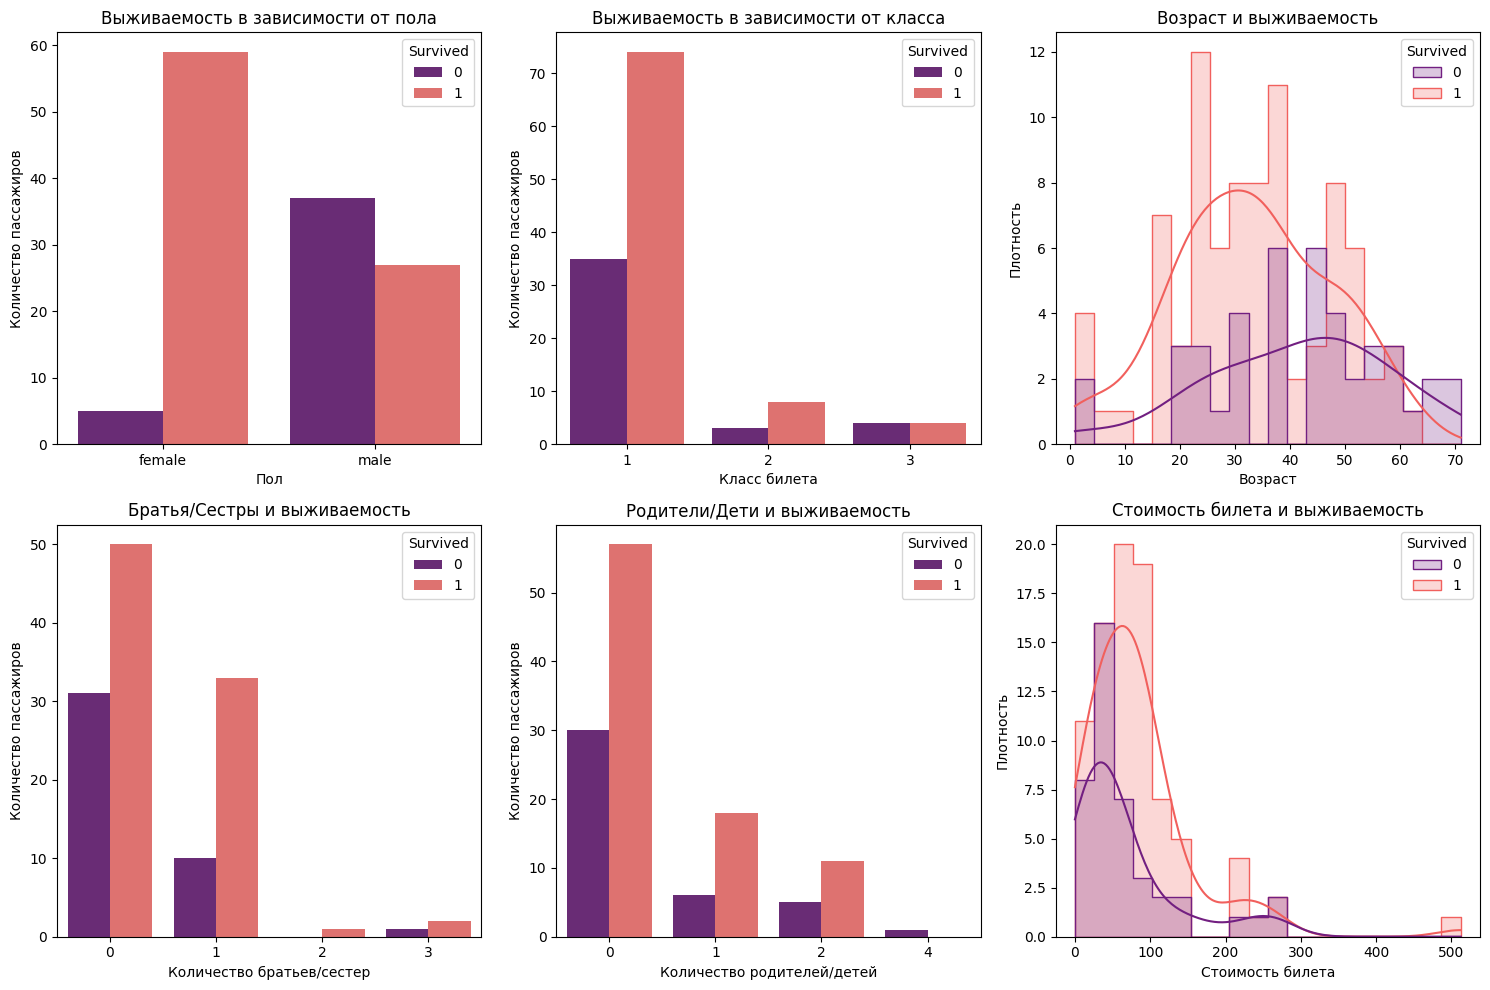

In [41]:
import seaborn as sns

train_df = X_train.copy()
train_df['Survived'] = y_train

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.countplot(x='Sex', hue='Survived', data=train_df, palette='magma')
plt.title('Выживаемость в зависимости от пола')
plt.xlabel('Пол')
plt.ylabel('Количество пассажиров')

plt.subplot(2, 3, 2)
sns.countplot(x='Pclass', hue='Survived', data=train_df, palette='magma')
plt.title('Выживаемость в зависимости от класса')
plt.xlabel('Класс билета')
plt.ylabel('Количество пассажиров')

plt.subplot(2, 3, 3)
sns.histplot(data=train_df, x='Age', hue='Survived', bins=20, kde=True, element='step', palette='magma')
plt.title('Возраст и выживаемость')
plt.xlabel('Возраст')
plt.ylabel('Плотность')

plt.subplot(2, 3, 4)
sns.countplot(x='SibSp', hue='Survived', data=train_df, palette='magma')
plt.title('Братья/Сестры и выживаемость')
plt.xlabel('Количество братьев/сестер')
plt.ylabel('Количество пассажиров')

plt.subplot(2, 3, 5)
sns.countplot(x='Parch', hue='Survived', data=train_df, palette='magma')
plt.title('Родители/Дети и выживаемость')
plt.xlabel('Количество родителей/детей')
plt.ylabel('Количество пассажиров')

plt.subplot(2, 3, 6)
sns.histplot(data=train_df, x='Fare', hue='Survived', bins=20, kde=True, element='step', palette='magma')
plt.title('Стоимость билета и выживаемость')
plt.xlabel('Стоимость билета')
plt.ylabel('Плотность')

plt.tight_layout()
plt.show()

#### 2. Классификация методом ближайшего соседа

В данной части задачи оставим только признаки `'Pclass'`, `'Age'`, `'Sex'`,`'Fare'`.


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3bfbe10cf933e1302c2f524a99acfa54 -->
Постройте классификатор методом ближайшего соседа. Обучите его и оцените качество модели. Сравните с предыдущим методом.

Пока никаких преобразований данных делать не нужно.




In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
features_columns = ['Pclass', 'Age', 'Sex', 'Fare']
target_column = 'Survived'

train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})

X = train_df[features_columns]
y = train_df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Точность модели KNN: {accuracy:.4f}")
print("Матрица ошибок:")
print(conf_matrix)

Точность модели KNN: 0.6667
Матрица ошибок:
[[ 3 10]
 [ 3 23]]


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 21227e76b996f62c6c83ee38ce486bdf -->
Попробуем улучшить результаты предсказаний, для этого надо сначала посмотреть на сами данные. Выведите значение минимального и максимального объекта для каждого признака.

In [43]:
min_values = train_df[features_columns].min()
max_values = train_df[features_columns].max()

summary_df = pd.DataFrame({
    'Минимальное значение': min_values,
    'Максимальное значение': max_values
})

print(summary_df)

        Минимальное значение  Максимальное значение
Pclass                  1.00                 3.0000
Age                     0.92                71.0000
Sex                     0.00                 1.0000
Fare                    0.00               512.3292


Как мы видим данные в каждом столбце распределены очень по-разному.

&#x2753; **Вопрос** &#x2753;
> Как это может повлиять на работу kNN, почему?

**Ваш ответ:**  Разное распределение данных в каждом столбце может негативно повлиять на работу алгоритма kNN, так как он использует расстояния для определения ближайших соседей. Признаки с большими значениями будут доминировать в расчетах, что может портить результаты


Для решения этой проблемы нужно привести признаки к единому масштабу. Существует много методов масштабирования, примените **минимаксную нормализацию**

  
> **Минимакс** &mdash; линейное преобразование данных в диапазоне $[0, 1]$, где минимальное и максимальное масштабируемые значения соответствуют 0 и 1 соответственно.
> Реализуется оно по следующей формуле:
>
> $$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}$$
>
> где $x_{ij}$ &mdash; значение признака $j$ для объекта $i$, а $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ в обучающем наборе данных.  
> В модуле `sklearn.preprocessing` есть [класс](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) `MinMaxScaler`, который реализует эту операцию. Давайте рассмотрим методы этого класса подробнее:
>
> * `fit(X)`: вычисляет минимальные и максимальные значения для каждого признака.
>
> * `transform(X)`: применяет масштабирование к данным.
>
> * `fit_transform(X)`: объединяет оба метода, сначала подгоняя модель, а затем трансформируя данные.
>
> * `inverse_transform(X)`: восстанавливает исходные данные из масштабированных.


Не забывайте, что существуют и другие методы масштабирования данных.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3cf8b0b6b0402c9ceb439c2de6ee4276 -->


Отмасштабируйте данные

In [49]:
from sklearn.preprocessing import MinMaxScaler
features_columns = ['Pclass', 'Age', 'Fare', 'Sex']

scaler = MinMaxScaler()

train_df[features_columns] = scaler.fit_transform(train_df[features_columns])


print(train_df[features_columns].head())

     Pclass       Age      Fare  Sex
10      1.0  0.043950  0.032596  1.0
583     0.0  0.500571  0.078319  0.0
486     0.0  0.486301  0.175668  1.0
224     0.0  0.529110  0.175668  0.0
305     0.0  0.000000  0.295806  0.0


Теперь выведите значения максимума и минимума нормализованных признаков. Обратите внимание `MinMaxScaler` возвращается объект в виде `np.ndarray`.

In [50]:
normalized_df = pd.DataFrame(train_df[features_columns], columns=features_columns)

min_values = normalized_df.min()
max_values = normalized_df.max()

# Объединяем результаты в один DataFrame для удобства
summary_df = pd.DataFrame({
    'Минимальное значение': min_values,
    'Максимальное значение': max_values
})

print(summary_df)

        Минимальное значение  Максимальное значение
Pclass                   0.0                    1.0
Age                      0.0                    1.0
Fare                     0.0                    1.0
Sex                      0.0                    1.0


Обучите модель и сравните результат предсказаний со нормализацией и без.

In [51]:
knn_no_scaling = KNeighborsClassifier(n_neighbors=5)
knn_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = knn_no_scaling.predict(X_test)
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_with_scaling = KNeighborsClassifier(n_neighbors=5)
knn_with_scaling.fit(X_train_scaled, y_train)
y_pred_with_scaling = knn_with_scaling.predict(X_test_scaled)
accuracy_with_scaling = accuracy_score(y_test, y_pred_with_scaling)

print(f'Точность без нормализации: {accuracy_no_scaling:.4f}')
print(f'Точность с нормализацией: {accuracy_with_scaling:.4f}')

Точность без нормализации: 0.6667
Точность с нормализацией: 0.8718


**Вывод:** Результаты показывают, что точность модели без нормализации составила 0.6667, тогда как с нормализацией она увеличилась до 0.8718. Это говорит о том, что минимаксная нормализация значительно улучшает качество предсказаний алгоритма kNN, позволяя более эффективно учитывать различные масштабы признаков. 

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 02a5bc7d6f2e8382a04db099c58ba6d1 -->
**А можем ли мы как-то еще повысить точность модели?**

Как мы видели, параметр $k$ числа соседей является необучаемым т.е. гиперпараметром, который выставляется вручную. Выбор оптимального значения $k$ важен, так как слишком маленькое значение может привести к переобучению, а слишком большое — к недообучению.



Постройте график зависимости точности (`accuracy_score`) от значения $k$ (от 1 до 20) для обучающей и тестовой выборок.

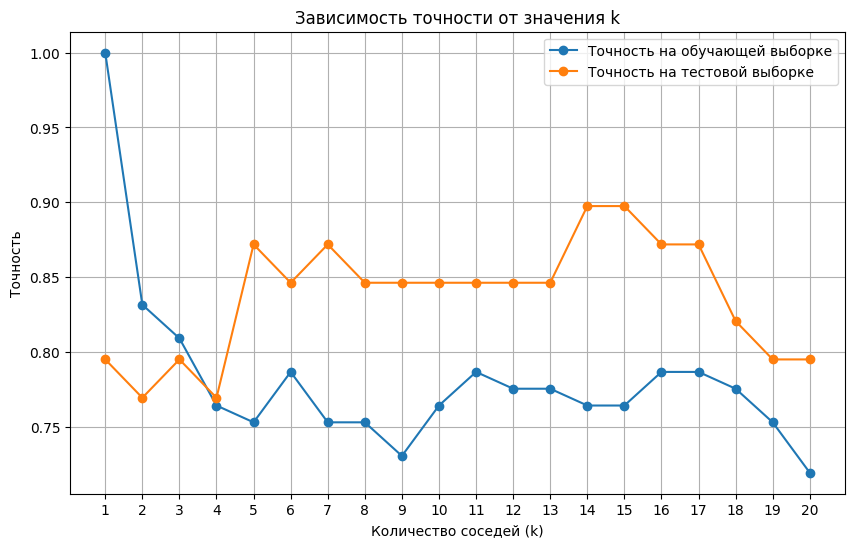

In [52]:
train_accuracies = []
test_accuracies = []

k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    y_train_pred = knn.predict(X_train_scaled)
    y_test_pred = knn.predict(X_test_scaled)
    
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Точность на обучающей выборке', marker='o')
plt.plot(k_values, test_accuracies, label='Точность на тестовой выборке', marker='o')
plt.title('Зависимость точности от значения k')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Точность')
plt.xticks(k_values)
plt.grid()
plt.legend()
plt.show()

**Вывод:** Из графика видно, что точность модели kNN зависит от выбора значения k - количества ближайших соседей. Для обучающей выборки точность достигает максимума при k=11-12, а для тестовой выборки при k=6-7. Для данной задачи оптимальным значением k будет находиться в диапазоне 6-12, потому что модель показывает наилучшую обобщающую способность. 